# Simulations For Lower-Extremity Injuries Prediction Models

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### System Dynamics Model

#### Euler's Method

Euler's numerical method is given by the equation: $$S(t_i+1)=S(t_i)+hF(t_i,S(t_i))$$

In [55]:
def euler(f, t, s0, h):
        s = np.zeros(len(t))
        s[0] = s0

        for i in range(0, len(t) - 1):
                s[i + 1] = s[i] + h * f(t[i], s[i])

        return s

#### Second Order Runge-Kutta Method

The second order Runge-Kutta numerical method is given by the equations:
$$k_1=F(t_i,S(t_i))$$
$$k_2=F(t_i+h,S(t_i)+k_1)$$
$$S(t_i+1)=S(t_i)+\dfrac{1}{2}(k_1+k_2) \times h$$

In [56]:
def runge_kutta_2(f, t, s0, h):
    s = np.zeros(len(t))
    s[0] = s0

    for i in range(0, len(t) - 1):
        k1 = h * f(t[i], s[i])
        k2 = h * f(t[i] + h, s[i] + k1)
        s[i + 1] = s[i] + (k1 + k2) / 2

    return s

#### Simulations

##### Model Formulation

In [57]:
def dsdt(t, s):
    #* EXAMPLE
    return np.exp(-t)

# f = lambda t, s: np.exp(-t) # ODE

# def dydt(x, y):
#     return x - y

##### Initial Conditions & Time Parameters

In [58]:
# Step size
h = 0.1
# Numerical grid
t = np.arange(0, 1 + h, h)
# Initial Condition
s0 = -1

##### Using Euler's Method

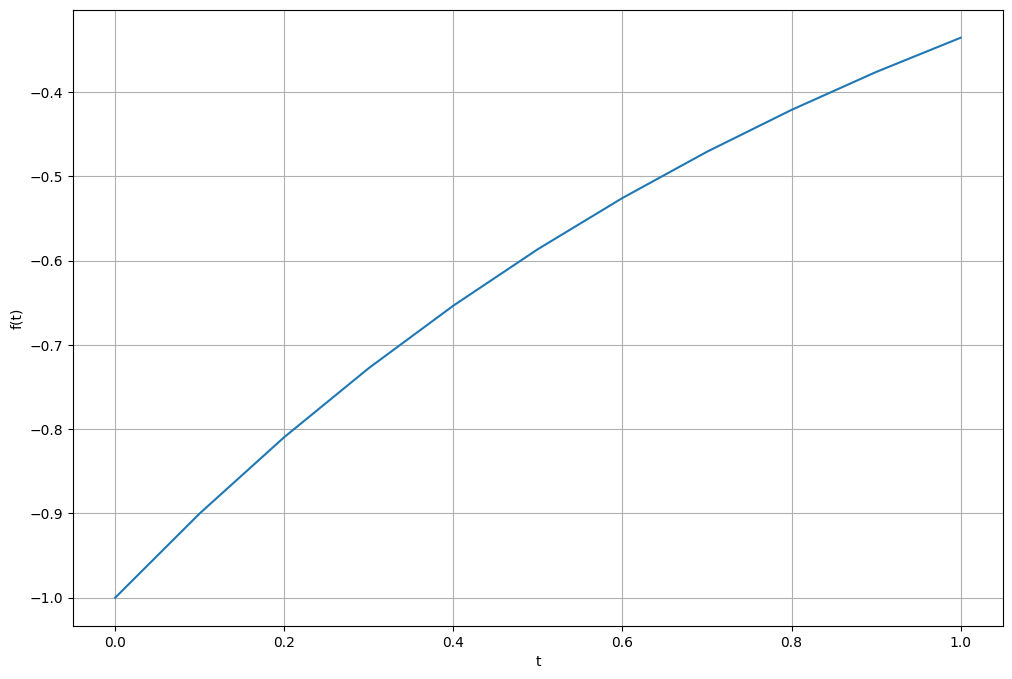

In [59]:
# Explicit Euler Method
s = euler(dsdt, t, s0, h)

plt.figure(figsize = (12, 8))
plt.plot(t, s, label='Approximate')
# plt.plot(t, -np.exp(-t), 'g', label='Exact')
# plt.title('Approximate and Exact Solution \
# for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
# plt.legend(loc='lower right')
plt.show()

##### Using The Second Order Runge-Kutta Method

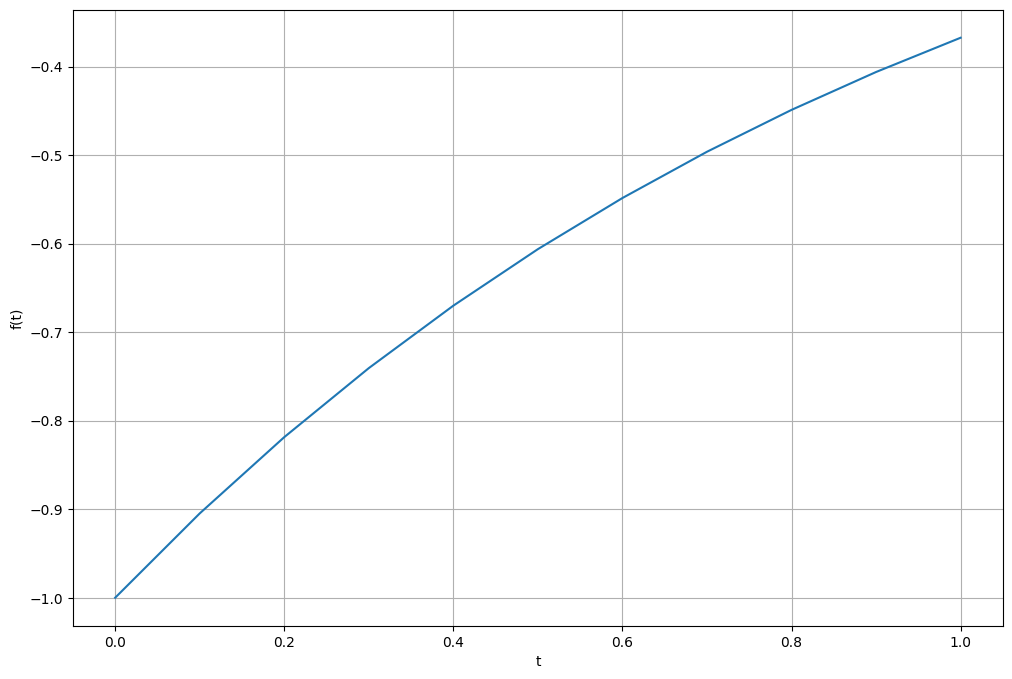

In [60]:
# Explicit Euler Method
s = runge_kutta_2(dsdt, t, s0, h)

plt.figure(figsize = (12, 8))
plt.plot(t, s, label='Approximate')
# plt.plot(t, -np.exp(-t), 'g', label='Exact')
# plt.title('Approximate and Exact Solution \
# for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
# plt.legend(loc='lower right')
plt.show()

### Regression Model

##### Logistic Regression Model
$$\hat{y} = \frac{1}{1 + e^{-X\theta}}$$

In [61]:
def logistic_regression(X, theta):
    z = np.dot(X, theta)
    # Use np.clip to avoid values that lead to numerical instability
    z = np.clip(z, -20, 20)
    return 1 / (1 + np.exp(-z))

##### Compute Gradient
$$\nabla_\theta J(\theta) = \frac{1}{m} X^T(\hat{y} - y)$$

In [62]:
def compute_gradient_logistic(X, y, theta):
    predictions = logistic_regression(X, theta)
    error = predictions - y
    gradient = np.dot(X.T, error) / len(y)
    return gradient

##### Compute Loss
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]$$

In [63]:
def logistic_loss(X, y, theta):
    predictions = logistic_regression(X, theta)
    # Clip predictions to avoid log(0)
    eps = 1e-15
    predictions = np.clip(predictions, eps, 1 - eps)
    return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

##### Gradient Descent using Euler Method

In [64]:
def gradient_descent_euler_logistic(X, y, theta, learning_rate, iterations):
    history = []  # to store the history of the cost function
    for _ in range(iterations):
        grad = compute_gradient_logistic(X, y, theta)
        theta = theta - learning_rate * grad
        history.append(logistic_loss(X, y, theta))
    return theta, history

##### Gradient Descent using Runge-Kutta 2nd Order Method

In [65]:
def gradient_descent_runge_kutta_2_logistic(X, y, theta, learning_rate, iterations):
    history = []  # to store the history of the cost function
    for _ in range(iterations):
        k1 = compute_gradient_logistic(X, y, theta)
        k2 = compute_gradient_logistic(X, y, theta - learning_rate * k1)
        theta = theta - (learning_rate / 2) * (k1 + k2)
        history.append(logistic_loss(X, y, theta))
    return theta, history

##### Simulation

In [70]:
# # Generate a classification dataset
# X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Add intercept
# X_train = np.c_[np.ones(X_train.shape[0]), X_train]
# X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# initialize empty lists
X_train, X_test, y_train, y_test = [], [], [], []


# load pickled data (after cleaning and splitting in data-cleaning.ipynb)
import pickle
with open('../data/running/pickles/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('../data/running/pickles/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('../data/running/pickles/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('../data/running/pickles/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)



# Initial parameters
theta_initial = np.zeros(X_train.shape[1])
learning_rate = 0.05
iterations = 1000


# Train the model using Euler and Runge-Kutta methods
theta_euler, history_euler = gradient_descent_euler_logistic(X_train, y_train, theta_initial, learning_rate, iterations)
theta_rk2, history_rk2 = gradient_descent_runge_kutta_2_logistic(X_train, y_train, theta_initial, learning_rate, iterations)

# Make predictions
# y_pred_euler = logistic_regression(X_test, theta_euler) >= 0.5
# y_pred_rk2 = logistic_regression(X_test, theta_rk2) >= 0.5

# Hyperparameter tuning of learning rate and iterations to find minimum loss, use multithreading to speed up
import multiprocessing as mp
import time


min_loss = np.inf
best_learning_rate = 0
best_iterations = 0
best_theta_euler = []
best_theta_rk2 = []
best_history_euler = []
best_history_rk2 = []

for learning_rate in [0.01, 0.05, 0.1, 0.5, 1]:
    for iterations in [100, 200, 500, 1000, 2000]:
        start = time.time()
        theta_euler, history_euler = gradient_descent_euler_logistic(X_train, y_train, theta_initial, learning_rate, iterations)
        theta_rk2, history_rk2 = gradient_descent_runge_kutta_2_logistic(X_train, y_train, theta_initial, learning_rate, iterations)
        end = time.time()
        print("Learning rate: ", learning_rate, "Iterations: ", iterations, "Time taken: ", end - start)
        print("Euler loss: ", history_euler[-1], "RK2 loss: ", history_rk2[-1])
        #if loss is minimum, save the parameters
        if min_loss > history_euler[-1] and min_loss > history_rk2[-1]:
            print("Minimum loss: ", min_loss, "Best iterations: ", best_iterations, "Best learning rate: ", best_learning_rate)
            min_loss = min(history_euler[-1], history_rk2[-1])
            best_iterations = iterations
            best_learning_rate = learning_rate
            best_theta_euler = theta_euler
            best_theta_rk2 = theta_rk2
            best_history_euler = history_euler
            best_history_rk2 = history_rk2

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)


X_train shape:  (322, 40)
X_test shape:  (139, 40)
y_train shape:  (322,)
y_test shape:  (139,)
Learning rate:  0.01 Iterations:  100 Time taken:  0.26695990562438965
Euler loss:  0.08404891165936279 RK2 loss:  0.060252265052322326
Minimum loss:  inf Best iterations:  0 Best learning rate:  0
Learning rate:  0.01 Iterations:  200 Time taken:  0.5277507305145264
Euler loss:  0.0409271643851009 RK2 loss:  0.03942320665931866
Minimum loss:  0.060252265052322326 Best iterations:  100 Best learning rate:  0.01
Learning rate:  0.01 Iterations:  500 Time taken:  1.3487355709075928
Euler loss:  0.011367953229227082 RK2 loss:  0.062111803958513075
Learning rate:  0.01 Iterations:  1000 Time taken:  2.6981494426727295
Euler loss:  0.0014463427414830624 RK2 loss:  0.01633244701989859
Minimum loss:  0.03942320665931866 Best iterations:  200 Best learning rate:  0.01
Learning rate:  0.01 Iterations:  2000 Time taken:  5.3972487449646
Euler loss:  0.0007131650083168137 RK2 loss:  0.00045988147413770

l:\Documents\(9) Cairo Uni Fall 2023\Modelling\Tasks & Projects\Term Project\injury-dynamics-model\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
l:\Documents\(9) Cairo Uni Fall 2023\Modelling\Tasks & Projects\Term Project\injury-dynamics-model\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
l:\Documents\(9) Cairo Uni Fall 2023\Modelling\Tasks & Projects\Term Project\injury-dynamics-model\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicte

Optimal threshold: 0.0
F1 score: 0.014285714285714287
Accuracy (Euler Method): 0.007194244604316547
Accuracy (Runge-Kutta 2nd Order Method): 0.007194244604316547


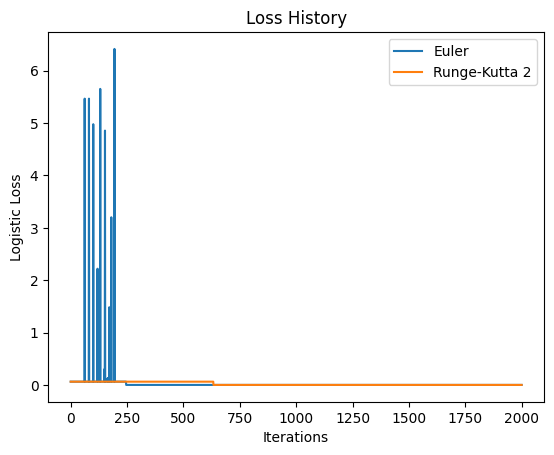

In [71]:
# Optimize the threshold
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# Initialize empty lists
thresholds = []
f1_scores = []
precisions = []

# Find the optimal threshold
for threshold in np.arange(0, 1, 0.01):
    y_pred_euler = logistic_regression(X_test, best_theta_euler) >= threshold
    f1 = f1_score(y_test, y_pred_euler)
    precision = precision_score(y_test, y_pred_euler)
    thresholds.append(threshold)
    f1_scores.append(f1)
    precisions.append(precision)

# Convert to numpy arrays
thresholds = np.array(thresholds)
f1_scores = np.array(f1_scores)
precisions = np.array(precisions)

# Find the threshold that maximizes F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)
print("F1 score:", f1_scores[optimal_idx])

# Predict using optimal threshold
y_pred_euler = logistic_regression(
    X_test, best_theta_euler) >= optimal_threshold
y_pred_rk2 = logistic_regression(X_test, best_theta_rk2) >= optimal_threshold

# Calculate accuracy
accuracy_euler = accuracy_score(y_test, y_pred_euler)
accuracy_rk2 = accuracy_score(y_test, y_pred_rk2)

print("Accuracy (Euler Method):", accuracy_euler)
print("Accuracy (Runge-Kutta 2nd Order Method):", accuracy_rk2)

# Plotting the loss history
plt.plot(history_euler, label='Euler')
plt.plot(history_rk2, label='Runge-Kutta 2')
plt.xlabel('Iterations')
plt.ylabel('Logistic Loss')
plt.title('Loss History')
plt.legend()
plt.show()

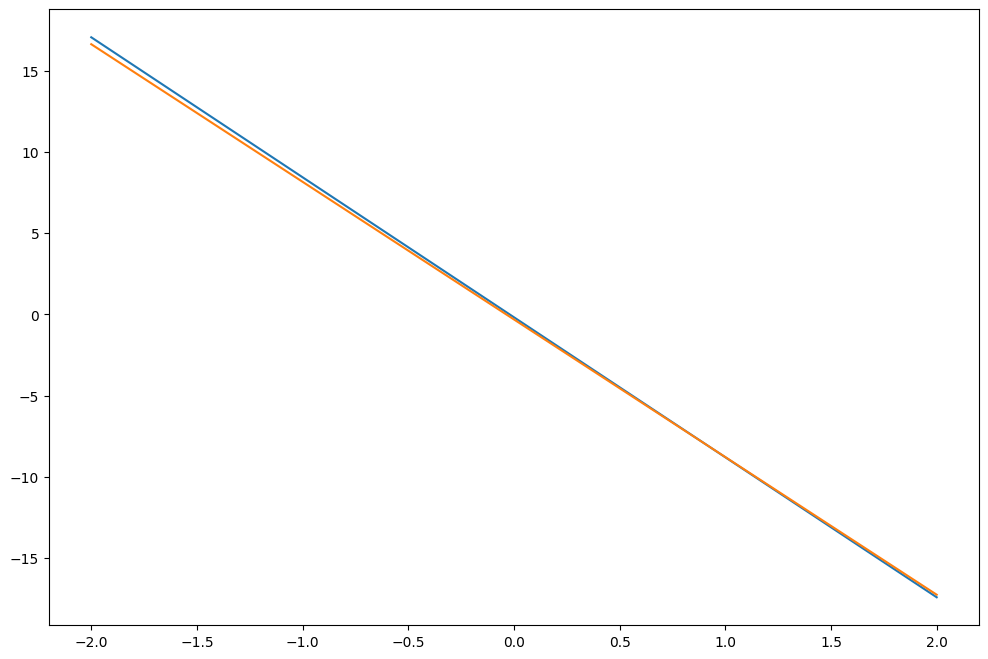

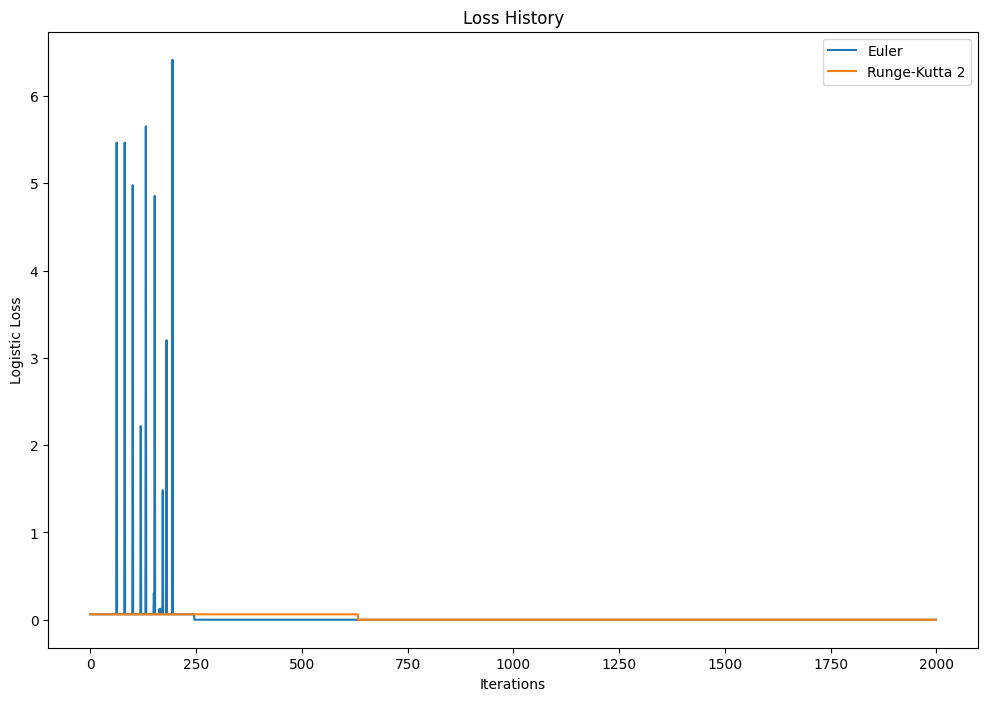

In [72]:
# Visualize predictions and their accuracy on the test set

# Plot the decision boundary
x1 = np.linspace(-2, 2, 10)
x2 = -(theta_euler[0] + theta_euler[1] * x1) / theta_euler[2]

plt.figure(figsize=(12, 8))
plt.plot(x1, x2, label='Euler')

x2 = -(theta_rk2[0] + theta_rk2[1] * x1) / theta_rk2[2]
plt.plot(x1, x2, label='Runge-Kutta 2')



# Plot the accuracy
plt.figure(figsize=(12, 8))
plt.plot(history_euler, label='Euler')
plt.plot(history_rk2, label='Runge-Kutta 2')
plt.xlabel('Iterations')
plt.ylabel('Logistic Loss')
plt.title('Loss History')
plt.legend()
plt.show()


